# Initial SetUp Done 🛠️

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Downlaod the data**

**Downlaod the package**

In [ ]:
!pip install netCDF4

In [ ]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

# Reading netCDF files
salinity_dataset = netCDF4.Dataset('/content/drive/MyDrive/Colab Notebooks/salinity.nc')
temperature_data = salinity_dataset.variables['temp_1_transformed']


temperature_dataset = netCDF4.Dataset('/content/drive/MyDrive/Colab Notebooks/temperature.nc')
salinity_data = temperature_dataset.variables['salt_1_transformed']

In [ ]:
# getting the time variable from the data
months = np.array(salinity_dataset.variables['time'])
months[:11]

array([683019., 683050., 683078., 683109., 683139., 683170., 683200.,
       683231., 683262., 683292., 683323.])

In [ ]:
# converting to numpy array (easy to handle)
salinity_with_depths = np.array(salinity_data)
temp_with_depths = np.array(temperature_data)

print("salinity data:", salinity_with_depths.shape)
print("temp data:", temp_with_depths.shape)

# (time, depth, latitude, longitude)

salinity data: (1680, 19)
temp data: (1680, 19)


In [ ]:
#taking mean

monthly_salinity = salinity_with_depths[:, 0]

monthly_temp = temp_with_depths[:, 0]

In [ ]:
# to check how our data looks like
len(monthly_salinity), monthly_salinity[0:10]

(1680,
 array([33.573944, 33.313976, 33.477024, 33.654533, 33.66336 , 33.618134,
        33.666786, 32.440456, 31.31438 , 31.297075], dtype=float32))

In [ ]:
# to get data years wise (taling mean of 12 values consecutively)

yearly_salinity = monthly_salinity.reshape(140, 12)
yearly_salinity = np.mean(yearly_salinity, axis=1)

yearly_temp = monthly_temp.reshape(140, 12)
yearly_temp = np.mean(yearly_temp, axis=1)

In [ ]:
#creating array of years
years = np.arange(1871, 2011)
year_of_months = []

for i in range(1871, 2011):
  for j in range(0, 12):
    year_of_months.append(round(i+j/12, 2));

year_of_months = np.array(year_of_months)


In [ ]:
year_of_months[:10]

array([1871.  , 1871.08, 1871.17, 1871.25, 1871.33, 1871.42, 1871.5 ,
       1871.58, 1871.67, 1871.75])

## Q2 PLOTTING

### Salinity

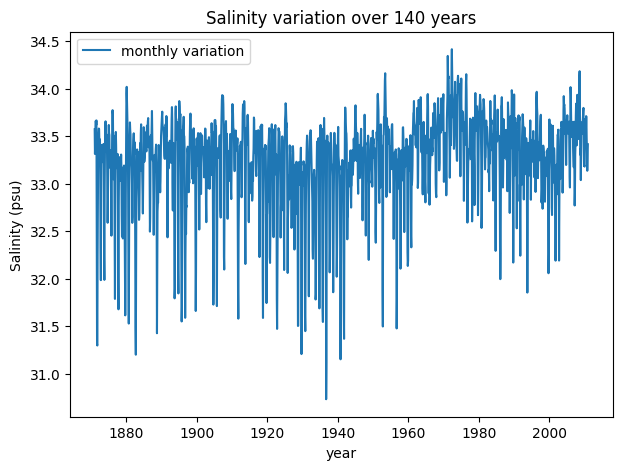

In [ ]:
# salinity
plt.figure(figsize=(7, 5))
plt.plot(year_of_months, monthly_salinity, label="monthly variation")
plt.title("Salinity variation over 140 years")
plt.ylabel("Salinity (psu)")
plt.xlabel("year")
plt.legend()
plt.show();

### Temperature

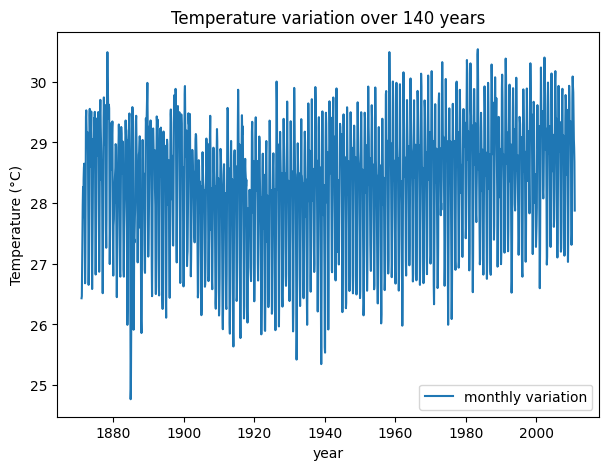

In [ ]:
# temperature
plt.figure(figsize=(7, 5))
plt.plot(year_of_months, monthly_temp, label="monthly variation")
plt.title("Temperature variation over 140 years")
plt.ylabel("Temperature (°C)")
plt.xlabel("year")
plt.legend()
plt.show();

In [ ]:
## helper function
def get_monthly_data(complete_data):
  monthly_data = []
  for month in range(12):
    temp = []
    for i in range(0, 140):
      temp.append(complete_data[i*12+month])
    monthly_data.append(temp)
  return monthly_data

def get_monthly_data_2(complete_data, month):
  ''' to get mothly data
  0: Jan, 1: Feb ...
  '''
  monthly_data = []
  for i in range(0, 140):
    monthly_data.append(complete_data[i*12+month])
  return monthly_data



### plotting month-wise data

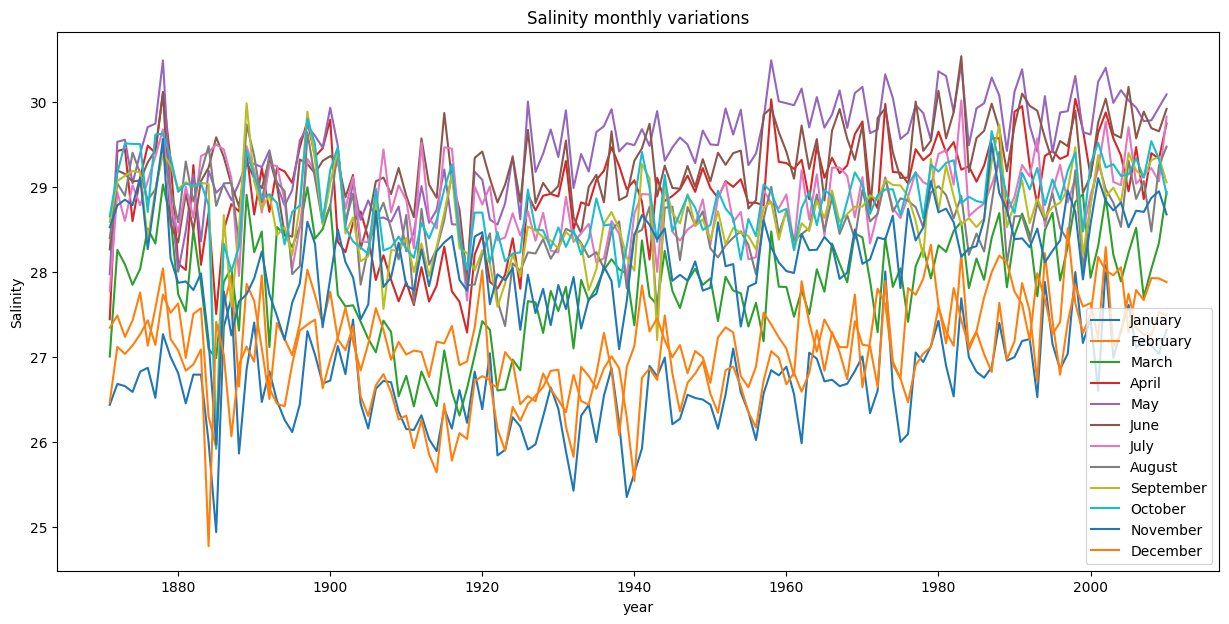

In [ ]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

## salinity

plt.figure(figsize=(15, 7))

for i in range(0, 12):
  plt.plot(years, get_monthly_data_2(monthly_temp, i), label=months[i])

plt.title("Salinity monthly variations")
plt.ylabel("Salinity")
plt.xlabel("year")

plt.legend()

plt.show();


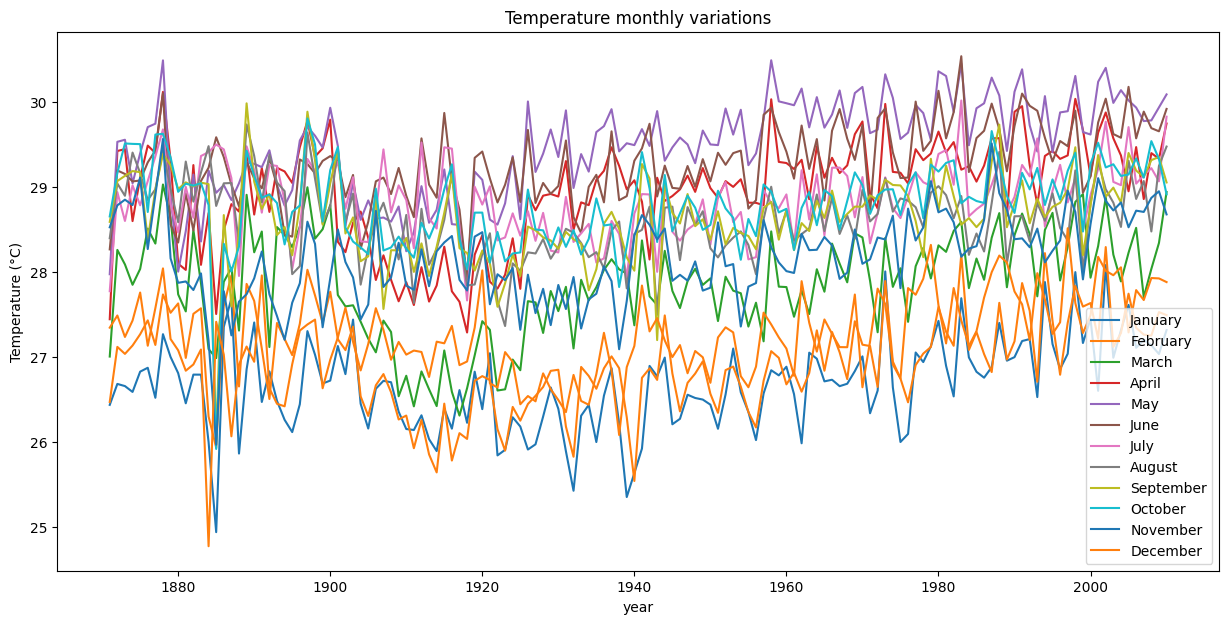

In [ ]:
## temperature

plt.figure(figsize=(15, 7))

for i in range(0, 12):
  plt.plot(years, get_monthly_data_2(monthly_temp, i), label=months[i])

plt.title("Temperature monthly variations")
plt.ylabel("Temperature (°C)")
plt.xlabel("year")

plt.legend()
plt.show();

## Q3 seasonal variations

In [ ]:
## helper function to get seasonal data

def get_seasonal_data(data):
  spring_data = []
  fall_data = []
  for i in range(0, 140):
    spring_data.append([data[i*12+1], data[i*12+2], data[i*12+3]])
    fall_data.append([data[i*12+9], data[i*12+10], data[i*12+11]])

  # seasonal average
  spring_data = np.mean(spring_data, axis=1)
  fall_data = np.mean(fall_data, axis=1)

  return (spring_data, fall_data)

In [ ]:
# seasonal salinity
spring_salinity, fall_salinity = get_seasonal_data(monthly_salinity)

# seasonal temperature
spring_temp, fall_temp = get_seasonal_data(monthly_temp)

### Plotting

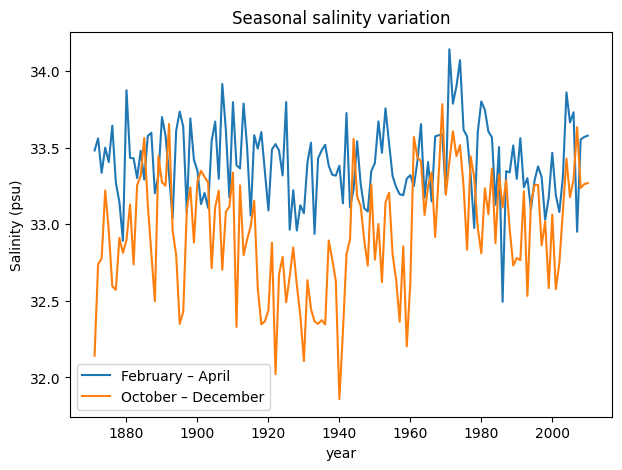

In [ ]:
plt.figure(figsize=(7, 5))

plt.plot(years, spring_salinity, label="February – April")
plt.plot(years, fall_salinity, label="October – December")

plt.title("Seasonal salinity variation")
plt.ylabel("Salinity (psu)")
plt.xlabel("year")
plt.legend()
plt.show();

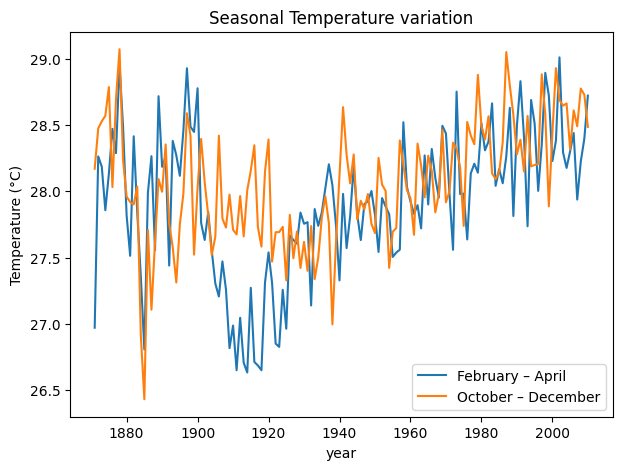

In [ ]:
plt.figure(figsize=(7, 5))

plt.plot(years, spring_temp, label="February – April")
plt.plot(years, fall_temp, label="October – December")

plt.title("Seasonal Temperature variation")
plt.ylabel("Temperature (°C)")
plt.xlabel("year")
plt.legend()
plt.show();

## Q4

In [ ]:
## seasonal standard deviation

def get_mean_std(spring_data, fall_data):
  mean = []
  standar_deviation = []
  for i in range(len(spring_data)):
    mean.append(np.mean([spring_data[i], fall_data[i]]))
    standar_deviation.append(np.std([spring_data[i], fall_data[i]]))
  return mean, standar_deviation

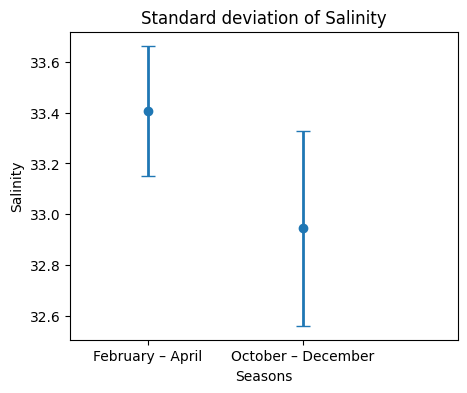

In [ ]:
## error bar plot

plt.figure(figsize=(5, 4))
plt.xlim(-0.5, 2) #padding

spring_avg = np.mean(spring_salinity)
fall_avg = np.mean(fall_salinity)
spring_std = np.std(spring_salinity)
fall_std = np.std(fall_salinity)

# salinity for plotting
seasons = ['February – April', 'October – December']
avg_salinity = [spring_avg, fall_avg]
std_deviation = [spring_std, fall_std]

# Create the error bar graph
plt.errorbar(seasons, avg_salinity, yerr=std_deviation, capsize=5, fmt ='o', linewidth = 2)
plt.xlabel('Seasons')
plt.ylabel('Salinity')
plt.title('Standard deviation of Salinity')
plt.show()

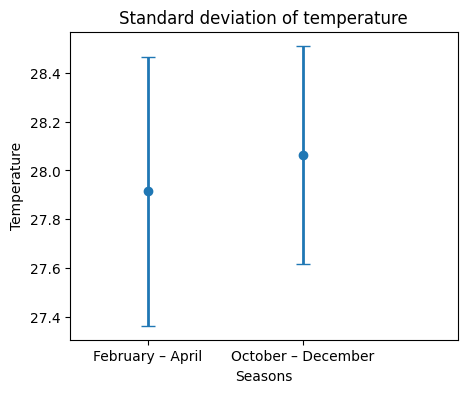

In [ ]:
## error bar plot

plt.figure(figsize=(5, 4))
plt.xlim(-0.5, 2) #padding

spring_avg = np.mean(spring_temp)
fall_avg = np.mean(fall_temp)
spring_std = np.std(spring_temp)
fall_std = np.std(fall_temp)

# temp for plotting
seasons = ['February – April', 'October – December']
avg_temperatures = [spring_avg, fall_avg]
std_deviation = [spring_std, fall_std]

# Create the error bar graph
plt.errorbar(seasons, avg_temperatures, yerr=std_deviation, capsize=5, fmt ='o', linewidth = 2)
plt.xlabel('Seasons')
plt.ylabel('Temperature')
plt.title('Standard deviation of temperature')
plt.show()

## Q5 T/S diagram during 1871-2010

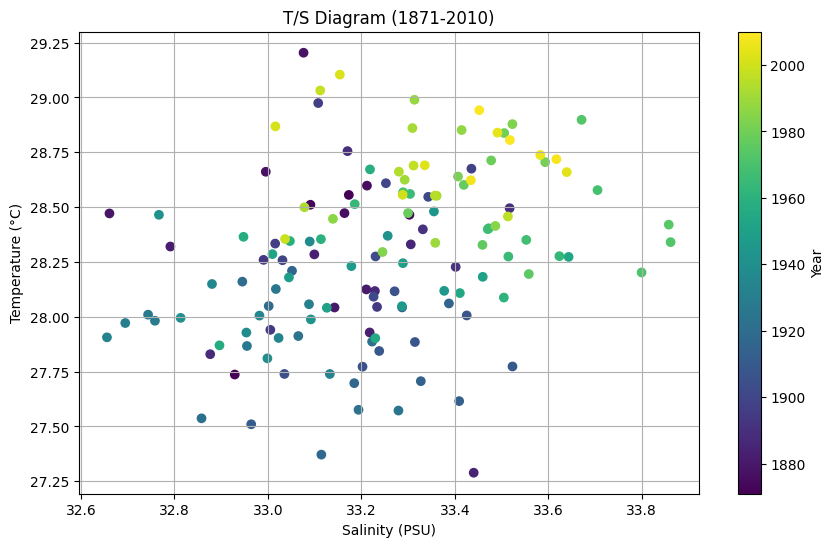

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(yearly_salinity, yearly_temp, c = years)
plt.ylabel('Temperature (°C)')
plt.xlabel('Salinity (PSU)')
plt.title('T/S Diagram (1871-2010)')
plt.colorbar(label='Year')
plt.grid()
plt.show()

## Q6 interannual variation

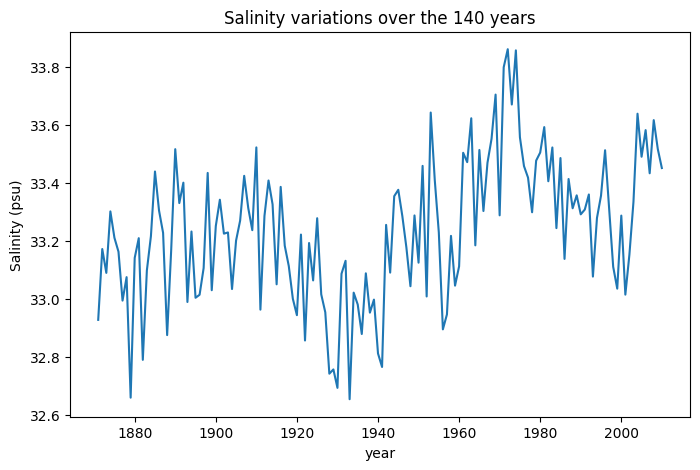

In [ ]:
# salinity
plt.figure(figsize=(8, 5))
plt.plot(years, yearly_salinity)
plt.title("Salinity variations over the 140 years")
plt.ylabel("Salinity (psu)")
plt.xlabel("year")
plt.show();

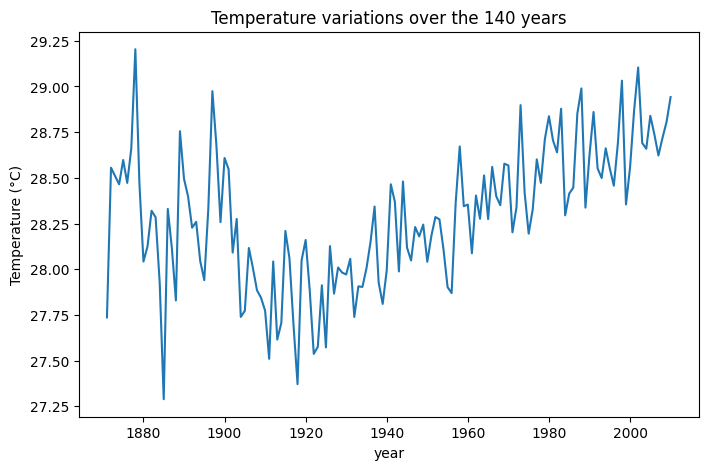

In [ ]:
#temperature

plt.figure(figsize=(8, 5))
plt.plot(years, yearly_temp)
plt.title("Temperature variations over the 140 years")
plt.ylabel("Temperature (°C)")
plt.xlabel("year")
plt.show();

## Q7

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
## getting data depth wise

salinity_with_depths = salinity
temperature_with_depths = temperature

# 19 depths, 1680 months
temperature_with_depths.shape

(1680, 19)

### Salinity

In [ ]:
salinity_slopes = []
salinity_intercepts = []

# transforming data according to LinearRegression
tranformed_year_of_months = year_of_months.reshape(-1, 1)

for i in range(19):

  # transforming data according to LinearRegression
  salinity_per_depth = salinity_with_depths[:, i]
  salinity_per_depth = np.squeeze(salinity_per_depth).reshape(-1, 1)

  model = LinearRegression()
  model.fit(tranformed_year_of_months, salinity_per_depth)

  salinity_slopes.append(model.coef_[0][0])
  salinity_intercepts.append(model.intercept_[0])

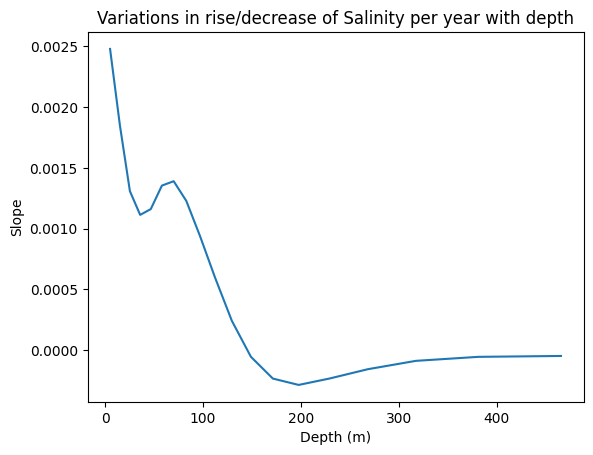

In [ ]:
# depths array
depths = np.array(salinity_dataset.variables['lev'])

plt.plot(depths, salinity_slopes)
plt.title("Variations in rise/decrease of Salinity per year with depth")
plt.ylabel("Slope")
plt.xlabel("Depth (m)")
plt.show();

### Temperature

In [ ]:
temperature_slopes = []

# transforming data according to LinearRegression
tranformed_year_of_months = year_of_months.reshape(-1, 1)

for i in range(19):

  # transforming data according to LinearRegression
  temperature_per_depth = temperature_with_depths[:, i]
  temperature_per_depth = np.squeeze(temperature_per_depth).reshape(-1, 1)

  model = LinearRegression()
  model.fit(tranformed_year_of_months, temperature_per_depth)

  temperature_slopes.append(model.coef_[0][0])

temperature_slopes

[0.004341492055002291,
 0.004276782794545399,
 0.004488203072555796,
 0.005164637371366737,
 0.006896074580135972,
 0.008638866072874129,
 0.010417668739425677,
 0.012235581045035688,
 0.01355586648649531,
 0.01373569755192665,
 0.012570021815663496,
 0.010486236491701882,
 0.007491220975487282,
 0.004617765020687908,
 0.0019029194789397573,
 0.000470652440057077,
 -0.000772964630850628,
 -0.001033291939670429,
 -0.0012846301624500338]

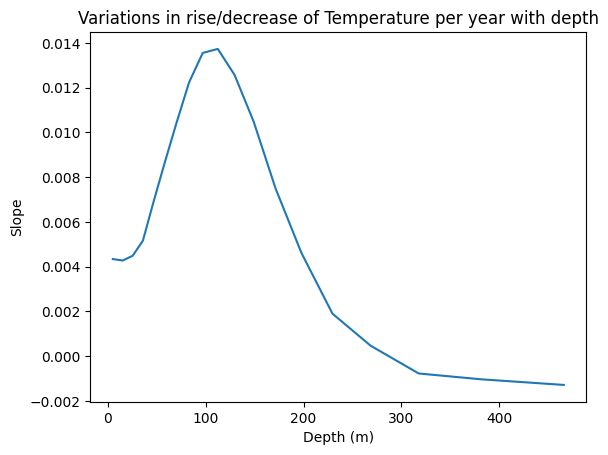

In [ ]:
# depths array
depths = np.array(temperature_dataset.variables['lev'])

# plotting
plt.plot(depths, temperature_slopes)
plt.title("Variations in rise/decrease of Temperature per year with depth")
plt.ylabel("Slope")
plt.xlabel("Depth (m)")
plt.show();




## Q8 AI/ ML models to predict the SST and SSS for the next 5 years

In [ ]:
### getting models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## future years

years_future = []
for i in range(2011, 2016):
  for j in range(0, 12):
    years_future.append(round(i+j/12, 2));

years_future = np.array(years_future)

### temperature

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(year_of_months, monthly_temp, test_size=150, random_state=0)

# models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor(n_estimators=100)

# reshaping and fitting
linear_reg.fit(X_train.reshape(-1, 1), y_train)
decision_tree_reg.fit(X_train.reshape(-1, 1), y_train);
random_forest_reg.fit(X_train.reshape(-1, 1), y_train);

# Predicting
predictions_linear_reg = linear_reg.predict(years_future.reshape(-1, 1))
predictions_decision_tree_reg = decision_tree_reg.predict(years_future.reshape(-1, 1))
predictions_random_forest_reg = random_forest_reg.predict(years_future.reshape(-1, 1))




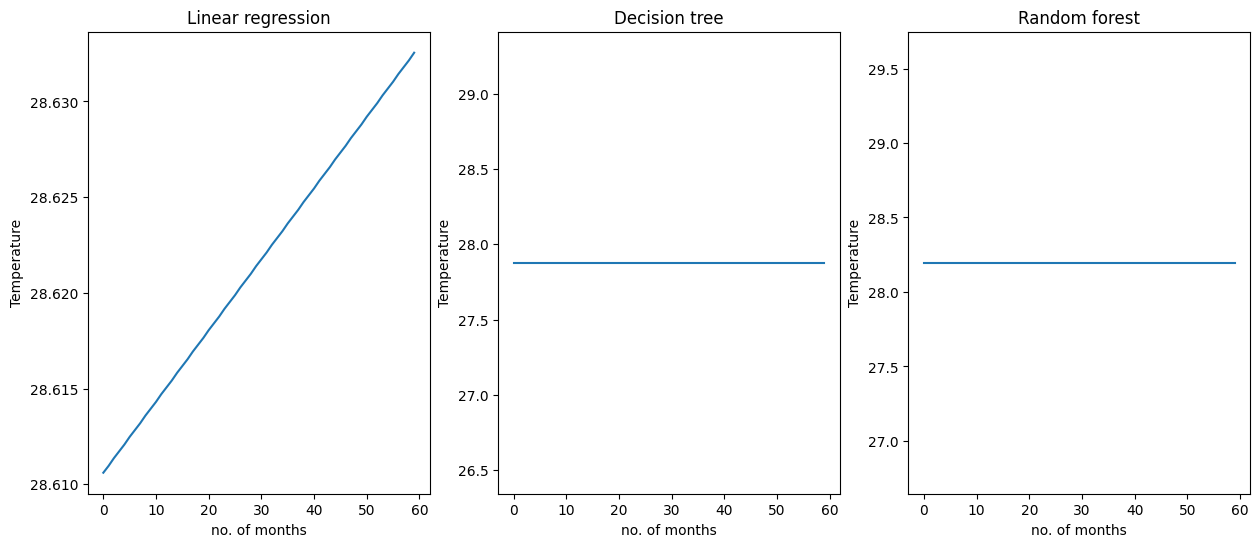

In [ ]:
plt.figure(figsize = (15,6))
plt.subplot(1,3,1)
plt.plot(predictions_linear_reg)
plt.ylabel("Temperature")
plt.xlabel("no. of months")
plt.title("Linear regression")


plt.subplot(1,3,2)
plt.plot(predictions_decision_tree_reg)
plt.title("Decision tree")
plt.ylabel("Temperature")
plt.xlabel("no. of months")

plt.subplot(1,3,3)
plt.plot(predictions_random_forest_reg)
plt.title("Random forest")
plt.ylabel("Temperature")
plt.xlabel("no. of months")


plt.show()



In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(year_of_months, monthly_salinity, test_size=150, random_state=0)

# models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor(n_estimators=100)

# reshaping and fitting
linear_reg.fit(X_train.reshape(-1, 1), y_train);
decision_tree_reg.fit(X_train.reshape(-1, 1), y_train);
random_forest_reg.fit(X_train.reshape(-1, 1), y_train);

# Predicting
predictions_linear_reg_sal = linear_reg.predict(years_future.reshape(-1, 1))
predictions_decision_tree_reg_sal = decision_tree_reg.predict(years_future.reshape(-1, 1))
predictions_random_forest_reg_sal = random_forest_reg.predict(years_future.reshape(-1, 1))




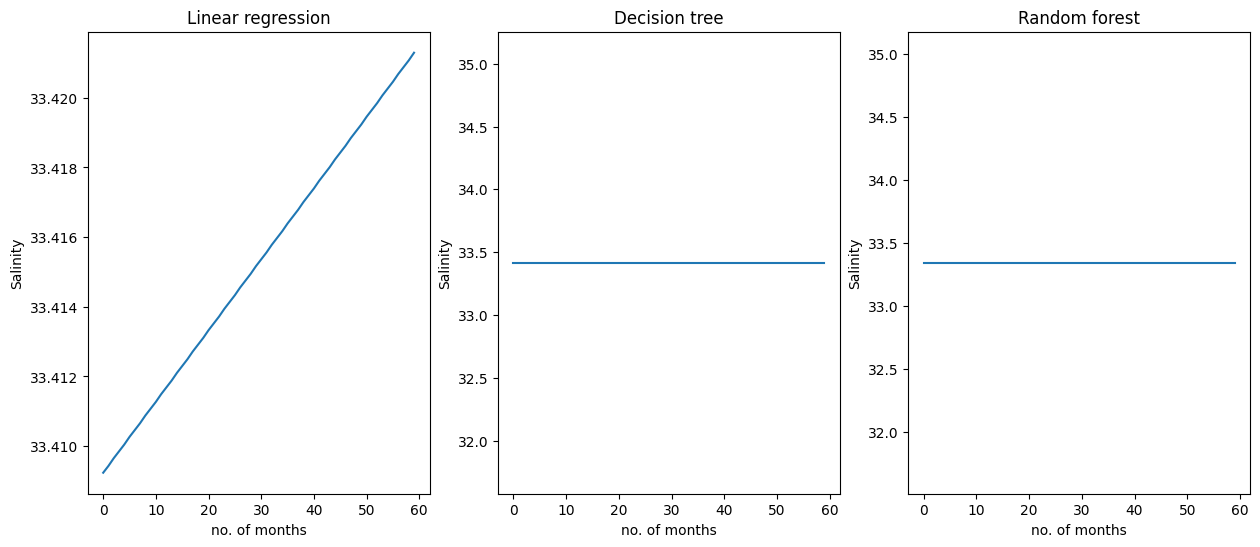

In [ ]:
plt.figure(figsize = (15,6))
plt.subplot(1,3,1)
plt.plot(predictions_linear_reg_sal)
plt.ylabel("Salinity")
plt.xlabel("no. of months")
plt.title("Linear regression")


plt.subplot(1,3,2)
plt.plot(predictions_decision_tree_reg_sal)
plt.title("Decision tree")
plt.ylabel("Salinity")
plt.xlabel("no. of months")

plt.subplot(1,3,3)
plt.plot(predictions_random_forest_reg_sal)
plt.title("Random forest")
plt.ylabel("Salinity")
plt.xlabel("no. of months")


plt.show()
